**Loading Data**

In [379]:
#Import libraries
import pandas as pd

#load datasets
historical_data = pd.read_csv(r'C:\Users\user\Desktop\Data-Storm-4\data-storm-4\Historical-transaction-data.csv')
store_data = pd.read_csv(r'C:\Users\user\Desktop\Data-Storm-4\data-storm-4\Store-info.csv')

In [380]:
#columns of historical dataset
historical_data.columns

Index(['item_description', 'transaction_date', 'invoice_id', 'customer_id',
       'shop_id', 'item_price', 'quantity_sold'],
      dtype='object')

In [381]:
#columns of store dataset
store_data.columns

Index(['shop_id', 'shop_area_sq_ft', 'shop_profile'], dtype='object')

**Pre-processing Historical Transaction Data**

In [382]:
historical_data.size

3317818

In [383]:
historical_data.dtypes

item_description     object
transaction_date     object
invoice_id          float64
customer_id          object
shop_id              object
item_price            int64
quantity_sold         int64
dtype: object

In [384]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473974 entries, 0 to 473973
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_description  438046 non-null  object 
 1   transaction_date  473974 non-null  object 
 2   invoice_id        467654 non-null  float64
 3   customer_id       473974 non-null  object 
 4   shop_id           473974 non-null  object 
 5   item_price        473974 non-null  int64  
 6   quantity_sold     473974 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 25.3+ MB


In [385]:
historical_data.shape

(473974, 7)

In [386]:
historical_data.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [387]:
#get categorical features
categorical_features = [column for column in historical_data.columns if historical_data[column].dtype == object]
print(categorical_features)

['item_description', 'transaction_date', 'customer_id', 'shop_id']


In [388]:
#Check different values of each categorical feature
for x in categorical_features:
    print(x)
    print(historical_data[x].value_counts())

item_description
GINGER BEER 1.5L                59864
CREAM SODA 1.5L                 39608
CREAM SODA 500ML                34320
GINGER BEER 1L                  26808
ORANGE BARLEY 1.5L              23180
NECTO 1.5L                      21746
SODA 500ML                      16802
BOTTLED DRINKING WATER 500ML    15786
SODA PET 1.5L                   15652
FIT O ORANGE 1L                 15392
LEMONADE 1.5L                   13433
SODA 1L                         13151
TONIC PET 500ML                 12704
GINGER BEER 500ML               11939
CREAM SODA APPLE POP 1L         11736
FIT O ORANGE 200ML               9490
BOTTLED DRINKING WATER 1.5L      9194
ORANGE CRUSH 1.5L                8288
FIT O MIXED FRUIT 200ML          7618
FIT O MIXED FRUIT 1L             7124
FIT O MANGO 1L                   6664
LEMONADE 500ML                   6453
FIT O MANGO 200ML                6333
GINGER BEER SUGAR FREE 500ML     5980
DRY GINGER ALE PET 500ML         5894
STRAWBERRY MILK 180ML            

In [389]:
historical_data.describe()

,invoice_id,item_price,quantity_sold
count,4.676540e+05,473974.000000,473974.000000
mean,1.996684e+06,206.689734,1.925506
std,1.344594e+06,166.764732,1.634535
min,1.700000e+01,35.000000,-1.000000
25%,1.032114e+06,100.000000,1.000000
50%,2.032996e+06,200.000000,2.000000
75%,3.032568e+06,220.000000,2.000000
max,8.331754e+06,17400.000000,101.000000


In [390]:
#Check null values
historical_data.isnull().sum()

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

<AxesSubplot:>

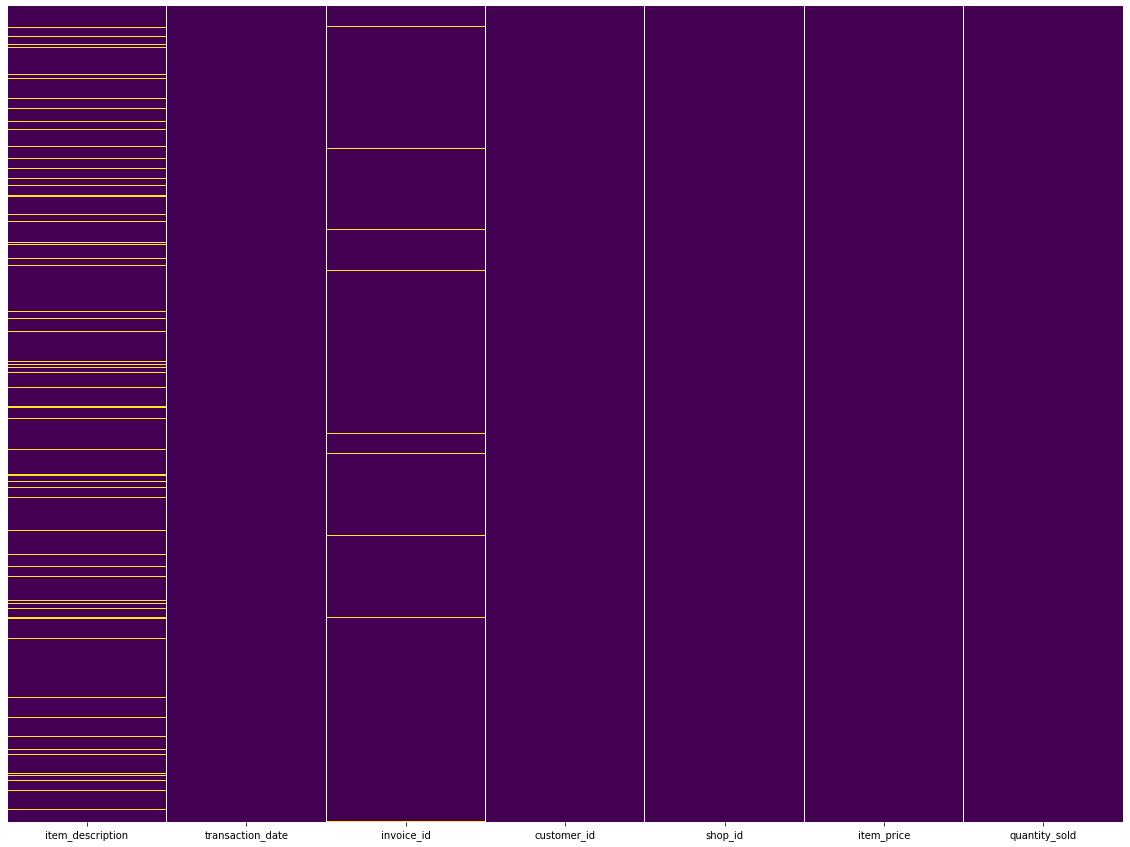

In [391]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(20,15))
sns.heatmap(historical_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [392]:
# Drop columns
historical_data.drop(columns=["item_description","invoice_id"], inplace=True)

In [393]:
historical_data.isnull().sum()

transaction_date    0
customer_id         0
shop_id             0
item_price          0
quantity_sold       0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(20,15))
sns.heatmap(historical_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
#Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['item_price', 'quantity_sold']
historical_data[numeric_features] = scaler.fit_transform(historical_data[numeric_features])

historical_data.head()

**Preporocessing Store Data**

In [ ]:
store_data.size

In [ ]:
store_data.info()

**Create Master Table**

In [ ]:
#Mearge two datasets
df = pd.merge(historical_data, store_data)

In [ ]:
# df.head()

In [ ]:
df.size

In [ ]:
#Divide transaction_data feature into two features
df['Date'], df['timestamp'] = df['transaction_date'].str.split('T', 1).str

In [ ]:
# df

In [ ]:
#drop timestamp column bcz its value is same for all rows
df = df.drop('timestamp', axis=1)

In [ ]:
#Divide Date feature into three features
df['year'], df['month'], df['day'] = df['Date'].str.split('-', 2).str

In [ ]:
# df.head()

In [ ]:
#drop columns bcz their values are same for all rows
df = df.drop(['Date', 'year', 'transaction_date'], axis=1)
df.head()

In [ ]:
#Encoding categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['customer_id'] = le.fit_transform(df['customer_id'])
df['shop_id'] = le.fit_transform(df['shop_id'])
df

In [ ]:
#Seperate records for testing data
import numpy as np

test_data = df[df['shop_profile'].isnull()]
test_data = test_data.drop('shop_profile', axis=1)
test_data.head()

In [ ]:
#drop rows with null values
df = df.dropna()

In [ ]:
df[df.isnull().any(axis=1)]

**Model Creation**

In [ ]:
#seperate features
feature = df.drop('shop_profile', axis=1)

In [ ]:
#seperate target
target = df['shop_profile']

In [ ]:
# feature.head()

In [ ]:
# target.head()

In [ ]:
#split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=1)

In [ ]:
# X_train.shape

In [ ]:
# X_test.shape

In [ ]:
# y_train.shape

In [ ]:
# y_test.shape

In [ ]:
#model training
from sklearn import tree
from sklearn.model_selection import GridSearchCV

dtc = tree.DecisionTreeClassifier(random_state=0)

params = {
    'min_samples_leaf': [1,2,3],
    'max_depth': [1,2,3]
}
grid = GridSearchCV(estimator=dtc,
                   param_grid=params,
                   cv=10,
                   n_jobs=1,
                   verbose=2)

dtc.fit(X_train, y_train)

In [ ]:
#model evaluation
from sklearn import metrics
y_pred = dtc.predict(X_test)
prec = metrics.precision_score(y_test, y_pred, average='macro')
rec = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Precision score : {prec}")
print(f"Recall score : {rec}")
print(f"F1 score : {f1}")

In [ ]:
# micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
# print(f"Micro-Averaged F1 score using sklearn library : {micro_averaged_f1}")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['High', 'Moderate', 'Low']))

In [ ]:
# y_pred

In [ ]:
#predict target for testing dataset
y_new = dtc.predict(test_data)
y_new

In [ ]:
test_data['shop_profile'] = y_new
test_data.head()

In [ ]:
# Create New DataFrame of Specific column by DataFrame.assign() method.
df2 = pd.DataFrame().assign(shop_id=test_data['shop_id'], shop_profile=test_data['shop_profile'])
print(df2)

In [ ]:
res = df2.groupby('shop_id')
res_df = res.first()
res_df

In [ ]:
arr = res['shop_id'].unique().astype(int)
print(arr)

In [ ]:
# To get labels from values 
arr2 = le.inverse_transform(arr)

In [ ]:
arr2

In [ ]:
# new = pd.DataFrame({'code': arr, 'shop_id': arr2})
new = pd.DataFrame(data=np.column_stack((arr,arr2)),columns=['code','shop_id'])
new = pd.merge(new, res_df,left_on='code', right_on='shop_id')
new = new.drop('code', axis=1)
new

In [ ]:
#save dataframe into csv file
new.to_csv('Testing-data.csv', index=False)